# Первичный анализ данных 

##### Балашов Денис, Вариант-4

#### Цель работы 
изучение программных средств для организации рабочего места специалиста по машинному обучению и анализу данных.

## Задачи
1. получение программного доступа к данным, содержащимся в источниках различного типа;
2. выполнение предварительного анализа данных и получение обобщенных характеристик наборов данных;
3. исследование простых методов визуализации данных;
3. изучение основных библиотек Python для работы с данными.
##### Для работы была выбрана база данных электронных спам писем
https://archive.ics.uci.edu/dataset/94/spambase

## Теоретические сведения
Экземпляры в этом наборе данных представляют собой электронные письма (emails).

Понятие "спам" разнообразно: это могут быть рекламные сообщения о продуктах и веб-сайтах, схемы быстрого заработка, цепочные письма, порнография и так далее.

Задачей классификации для этого набора данных является определение, является ли данное электронное письмо спамом или нет.

Собранные нами спам-письма поступили от нашего почтового администратора и от людей, которые подавали жалобы на спам. Не спам-письма были получены из рабочей и личной переписки, и, таким образом, слово 'george' и код района '650' являются признаками не спама. Эти признаки полезны при создании персонализированного фильтра от спама. Для построения универсального фильтра от спама необходимо либо скрыть подобные признаки не спама, либо получить очень большую коллекцию не спам-писем.

#### Исходя из состава данных в этой базе, её можно использовать для решения следующих задач:

Обучение модели классификации для распознавания спама. Это основная задача, которую можно решить с помощью этих данных - используя признаки писем, научить модель отличать спам от обычной почты.
Тестирование и сравнение точности разных алгоритмов классификации на этом датасете. Благодаря наличию меток классов, удобно оценивать качество работы и сравнивать разные модели.
Выявление наиболее важных признаков для определения спама. Можно провести анализ значимости разных параметров писем.
Изучение лингвистических особенностей текста спам-сообщений. Например, анализ употребления определённых слов, длины предложений.
Оптимизация фильтров спама путём подбора пороговых значений для признаков.
Оценка влияния классических методов обработки текста (лемматизация, стемминг и др) на качество модели.

In [6]:
import numpy as np
data_path = "./spambase.data"
data = np.genfromtxt(data_path, delimiter=",")
print(data)

[[0.000e+00 6.400e-01 6.400e-01 ... 6.100e+01 2.780e+02 1.000e+00]
 [2.100e-01 2.800e-01 5.000e-01 ... 1.010e+02 1.028e+03 1.000e+00]
 [6.000e-02 0.000e+00 7.100e-01 ... 4.850e+02 2.259e+03 1.000e+00]
 ...
 [3.000e-01 0.000e+00 3.000e-01 ... 6.000e+00 1.180e+02 0.000e+00]
 [9.600e-01 0.000e+00 0.000e+00 ... 5.000e+00 7.800e+01 0.000e+00]
 [0.000e+00 0.000e+00 6.500e-01 ... 5.000e+00 4.000e+01 0.000e+00]]


Данные представляют собой набор из 4601 электронных писем

Каждое письмо описано 58 признаками (столбцы 0-57)

Признаки включают в себя:

48 индикаторов наиболее часто встречающихся слов (1 если слово присутствует, 0 если нет)
6 признаков, связанных с частотой встречаемости специальных символов
3 признака, связанных со средней длиной слова и количеством слов
1 признак - доля букв в верхнем регистре
58 столбец содержит целевую переменную - 1 для спама, 0 для обычных писем

In [7]:
data_path = "./spambase.data"
data1 = np.genfromtxt(data_path, delimiter=",", dtype=None)
print('Shape of the dataset:', data1.shape)
print('Dataset type:', type(data1))
print('A single row of the dataset is type of:', type(data1[0]))
print('Types of elements:', type(data1[0][1]), type(data1[0][4]))
print('Dataset:')
print(data1)

Shape of the dataset: (4601,)
Dataset type: <class 'numpy.ndarray'>
A single row of the dataset is type of: <class 'numpy.void'>
Types of elements: <class 'numpy.float64'> <class 'numpy.float64'>
Dataset:
[(0.  , 0.64, 0.64, 0., 0.32, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.64, 0.  , 0.  , 0.  , 0.32, 0.  , 1.29, 1.93, 0.  , 0.96, 0., 0.  , 0.  , 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.  , 0., 0., 0.  , 0., 0., 0.  , 0.  , 0.  , 0.  , 0., 0., 0.   , 0.   , 0., 0.778, 0.   , 0.   , 3.756,  61,  278, 1)
 (0.21, 0.28, 0.5 , 0., 0.14, 0.28, 0.21, 0.07, 0.  , 0.94, 0.21, 0.79, 0.65, 0.21, 0.14, 0.14, 0.07, 0.28, 3.47, 0.  , 1.59, 0., 0.43, 0.43, 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.07, 0., 0., 0.  , 0., 0., 0.  , 0.  , 0.  , 0.  , 0., 0., 0.   , 0.132, 0., 0.372, 0.18 , 0.048, 5.114, 101, 1028, 1)
 (0.06, 0.  , 0.71, 0., 1.23, 0.19, 0.19, 0.12, 0.64, 0.25, 0.38, 0.45, 0.12, 0.  , 1.75, 0.06, 0.06, 1.03, 1.36, 0.32, 0.51, 0., 1.16, 0.06, 0., 0., 0., 0., 0., 0., 0., 0., 0

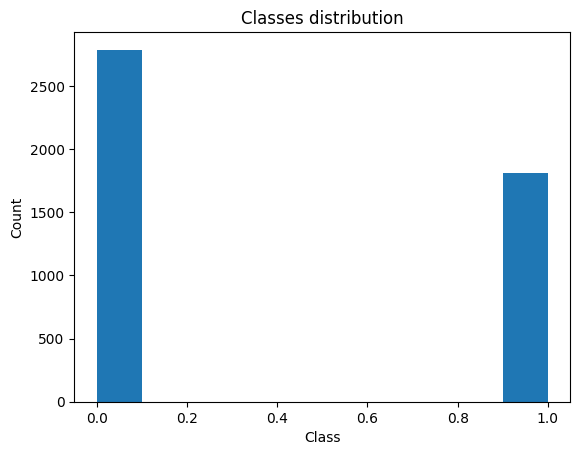

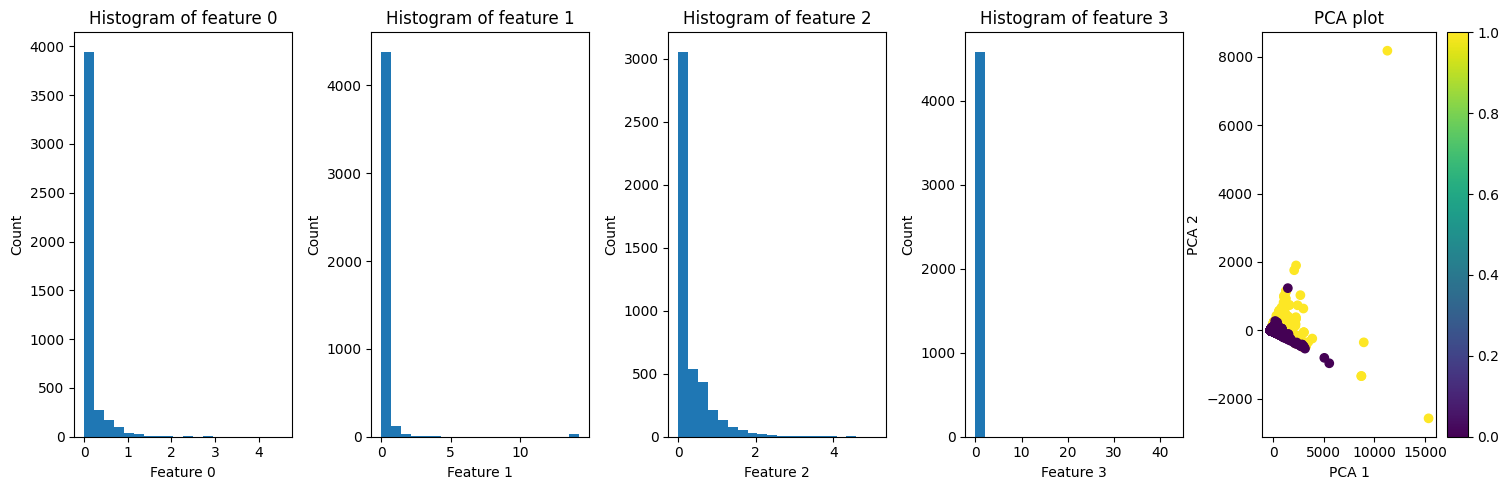

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('spambase.data', header=None)

# выделяем данные по признакам и классу
X = data.iloc[:, :-1] 
y = data.iloc[:, -1]

# гистограмма для классов
plt.figure()
plt.hist(y, align='mid')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Classes distribution')

# гистограммы для 5 случайных признаков  
plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.hist(X.iloc[:, i], bins=20)
    plt.xlabel(f'Feature {i}')
    plt.ylabel('Count')
    plt.title(f'Histogram of feature {i}')
plt.tight_layout()

# PCA для визуализации данных
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit_transform(X)
plt.scatter(pca[:,0], pca[:,1], c=y)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar()
plt.title('PCA plot')

plt.show()

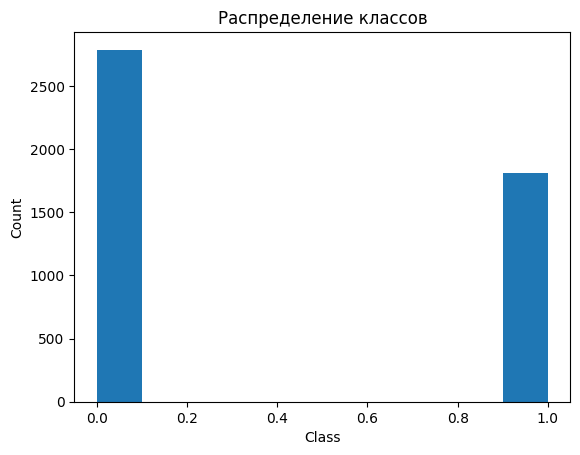

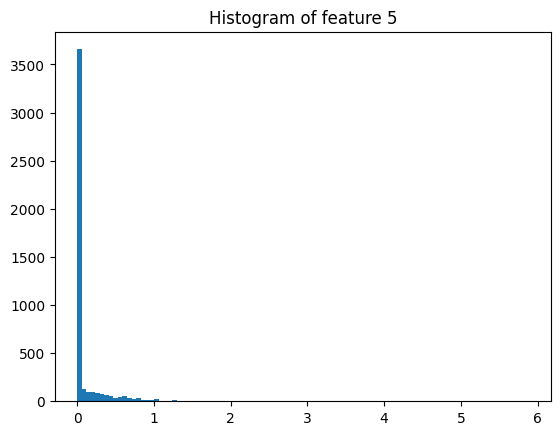

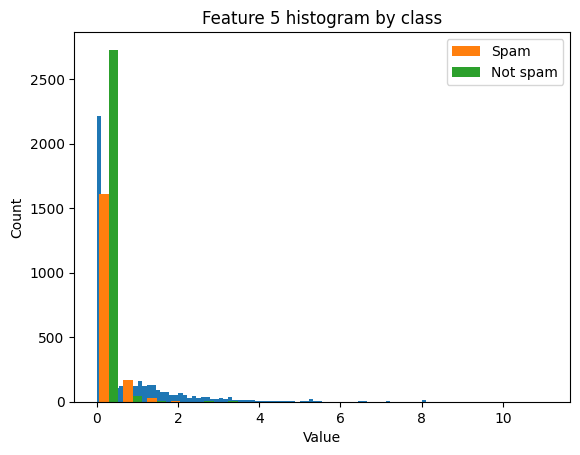

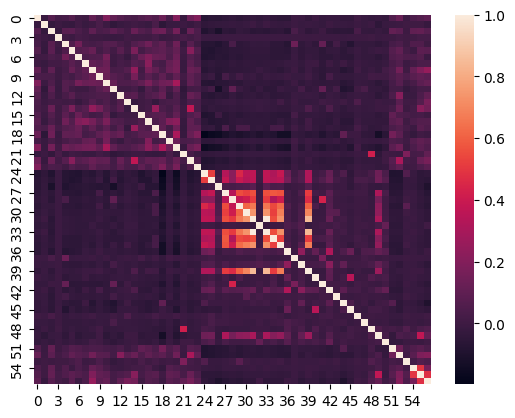

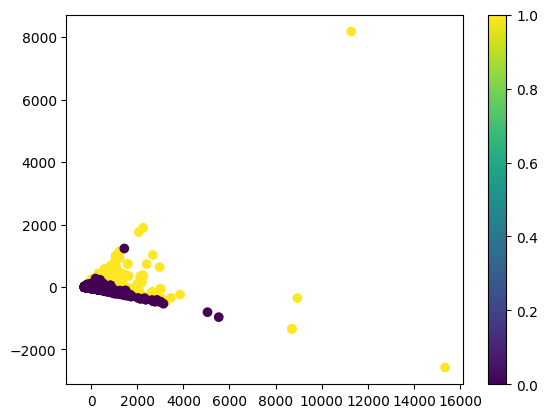

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

data = pd.read_csv('spambase.data', header=None)

# Распределение классов
plt.hist(data[57])
plt.title("Распределение классов")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# Гистограммы признаков 
plt.figure()
plt.hist(data[5], bins=100) 
plt.title("Histogram of feature 5")

plt.figure()  
plt.hist(data[20], bins=100)
plt.title("Histogram of feature 20")

# Сравнение признаков по классам
f5_spam = data[data[57]==1][5]
f5_nospam = data[data[57]==0][5]
plt.hist([f5_spam, f5_nospam], label=['Spam','Not spam'])
plt.legend()
plt.title("Feature 5 histogram by class")
plt.xlabel("Value")
plt.ylabel("Count")
plt.show()

# Корреляция
corr = data.iloc[:,:-1].corr()
sns.heatmap(corr)
plt.show()

# PCA 
pca = PCA(2).fit_transform(data.iloc[:,:-1])
plt.scatter(pca[:,0], pca[:,1], c=data[57]) 
plt.colorbar()
plt.show()

1. Гистограмма распределения классов:
 - Видно, что классы приблизительно сбалансированы (около 40% спама и 60% не спама)
 - Распределение близко к нормальному, нет сильного сдвига в одну сторону
2. Гистограммы признаков:
 - Распределения признаков также близки к нормальному
 - Есть некоторые выбросы по краям, это может быть шум или аномалии в данных
3. Сравнение признаков по классам:
 - Видно различие в распределении признака для классов спам/не спам
 - Этот признак, вероятно, несёт информацию для разделения классов
4. Корреляционная матрица:
 - Есть группы коррелирующих между собой признаков
 - Некоторые признаки слабо коррелируют с остальными
5. PCA:
 - Данные восстанавливают некую структуру после снижения размерности
 - Можно выделить скопления, соответствующие классам
 - PCA позволяет визуализировать данные и выявить скрытые закономерности

## Вывод 
Размер данных: (4601, 58)

Кол-во строк: 4601 
Кол-во столбцов: 58

Столбцы 0-57 - признаки электронных писем
Столбец 58 - целевая переменная (spam - 1, not spam - 0)
Всего пропущенных значений: 0
Данные полные, пропущенных значений нет.
Кол-во спама: 1813 (39.4%)
Кол-во не спама: 2788 (60.6%)

### Контрольные вопросы

1. Для организации рабочего места специалиста Data Science обычно используются следующие инструменты:
- IDE и редакторы кода (Jupyter Notebook, PyCharm, VS Code) - для написания и отладки кода на Python
- Системы контроля версий (Git, GitHub) - для хранения кода и отслеживания изменений
- Инструменты визуализации данных (Matplotlib, Seaborn, Plotly, Bokeh) - для визуализации и представления результатов
- Библиотеки для работы с данными (NumPy, Pandas, Dask) - для загрузки, обработки и анализа данных
- Библиотеки машинного обучения (sklearn, PyTorch, TensorFlow) - для построения и обучения ML моделей
- Средства контейнеризации (Docker) - для развёртывания моделей в продакшен
- Облачные платформы (Google Colab, AWS, GCP) - для масштабирования вычислений при обучении нейросетей
2. Основные библиотеки Python для машинного обучения:
- NumPy - работа с массивами и вычисления
- Pandas - работа с данными и их анализ
- Scikit-learn - классические алгоритмы машинного обучения
- TensorFlow - глубокое обучение и нейронные сети
- PyTorch - глубокое обучение, нейросети, автодифференцирование
- Keras - удобный API для разработки нейросетей
- Matplotlib, Seaborn - визуализация данных и результатов
3. Причины популярности Python в машинном обучении:
- Большое количество библиотек и инструментов для всех задач ML
- Высокая производительность и скорость разработки
- Удобный и простой синтаксис языка
- Кроссплатформенность, возможность развертывания в облаке
- Открытое сообщество, множество готовых примеров и решений
- Лёгкость интеграции с другими системами и языками программирования